Importing packages

In [23]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib as mpl
import scipy.stats as si

Importing data for "XRP-USD" from yahoo finance for one year time period.

In [24]:
data = yf.download("XRP-USD", start="2022-01-01", end="2023-01-01")

[*********************100%***********************]  1 of 1 completed


In [25]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-01-01,0.831281,0.853198,0.830741,0.849472,0.849472,1156464024
2022-01-02,0.849442,0.863558,0.839157,0.859118,0.859118,1134033205
2022-01-03,0.859107,0.859107,0.824052,0.832885,0.832885,1428968710
2022-01-04,0.832851,0.844076,0.819615,0.824673,0.824673,1514079366
2022-01-05,0.824714,0.835533,0.732704,0.774358,0.774358,2252733064


In [26]:
data.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-12-27,0.365728,0.372270,0.359441,0.368126,0.368126,905248563
2022-12-28,0.368122,0.368543,0.356136,0.356531,0.356531,839617676
2022-12-29,0.356524,0.357225,0.338911,0.342846,0.342846,898022518
2022-12-30,0.342831,0.345313,0.335333,0.345017,0.345017,672119602
2022-12-31,0.345032,0.345100,0.339868,0.339929,0.339929,337167278


In [27]:
initial_data.plot(figsize=(10, 12), subplots=True)

NameError: name 'initial_data' is not defined

For Annualized volatility, 3-month data is being used.

In [ ]:
data = yf.download("XRP-USD", start="2022-10-01", end="2023-01-01")

First we have to find the log returns of the closing prices of the cryptocurrency

In [ ]:
log_return = np.log(data['Adj Close'] / data['Adj Close'].shift(1))

In order to annualized the volatiliy, multiplying it with square root of 365 i.e. the trading days of the crypocurrency per year

In [28]:
vol = np.sqrt(365) * log_return.std()
print('The annualised volatility is', round(vol*100,2), '%')

NameError: name 'log_return' is not defined

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as si
import yfinance as yf

Methodologies used to calculate prices for the call option

1. Black Scholes method
2. Monte Carlo Simulation

# The Black Scholes Method

In [30]:
def euro_option_bs(S, K, T, r, vol, payoff):
    
    
    d1 = (np.log(S / K) + (r + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        option_value = S * si.norm.cdf(d1, 0.0, 1.0) - K * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
    elif payoff == "put":
        option_value = - S * si.norm.cdf(-d1, 0.0, 1.0) + K * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0)
    
    return option_value

In [31]:
S = 0.34
K = 0.5
T = 0.25   # 3 Months time period
r = 0.03
q = 0

In [32]:
euro_option_bs(S, K, T, r, vol, 'call')

NameError: name 'vol' is not defined

In [33]:
S = np.linspace(0.1,0.5,11)
cp = np.zeros((len(S),1))
for i in range(len(S)):
    cp[i] = euro_option_bs(S[i], 0.5, 0.25, 0.03, 0.83, 'call')

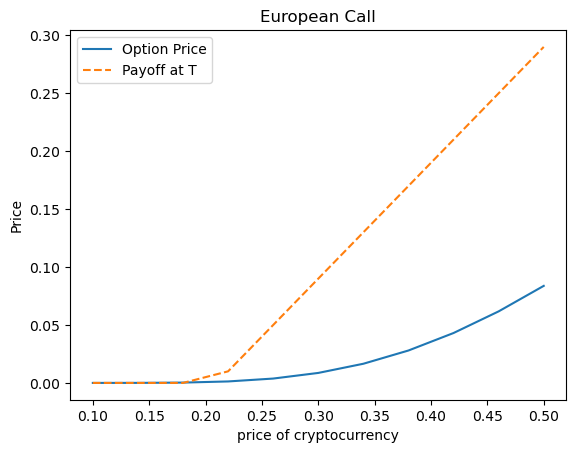

In [34]:
fig = plt.figure()
plt.plot(S, cp, '-')
plt.plot(S, np.maximum(S-0.21,0), '--')
plt.xlabel('price of cryptocurrency')
plt.ylabel('Price')
plt.title('European Call')
plt.legend(['Option Price','Payoff at T'])

Call price from Black Scholes method

# 2) Monte Carlo Simulation

In [35]:
def mcs_simulation_np(p):
    M = p
    I = p
    dt = T / M 
    S = np.zeros((M + 1, I))
    S[0] = S0 
    rn = np.random.standard_normal(S.shape) 
    for t in range(1, M + 1): 
        S[t] = S[t-1] * np.exp((r - vol ** 2 / 2) * dt + vol * np.sqrt(dt) * rn[t]) 
    return S

In [36]:
T = 0.25
r = 0.03
vol = 0.83
S0 = 0.34
K = 0.5

In [37]:
S = mcs_simulation_np(1000)

In [38]:
S = np.transpose(S)
S

array([[0.34      , 0.3421833 , 0.34168177, ..., 0.18537757, 0.18206376,
        0.18353387],
       [0.34      , 0.33885546, 0.33479759, ..., 0.34562533, 0.3424271 ,
        0.34344285],
       [0.34      , 0.33964497, 0.34843942, ..., 0.5220791 , 0.53600712,
        0.5368671 ],
       ...,
       [0.34      , 0.3362777 , 0.33396187, ..., 0.31176123, 0.3151592 ,
        0.31633293],
       [0.34      , 0.3425632 , 0.34280733, ..., 0.61883389, 0.61745515,
        0.61461234],
       [0.34      , 0.34134257, 0.33949269, ..., 0.33630672, 0.33708306,
        0.33783814]])

Text(0.5, 1.0, 'Frequency distribution of the simulated end-of-preiod values')

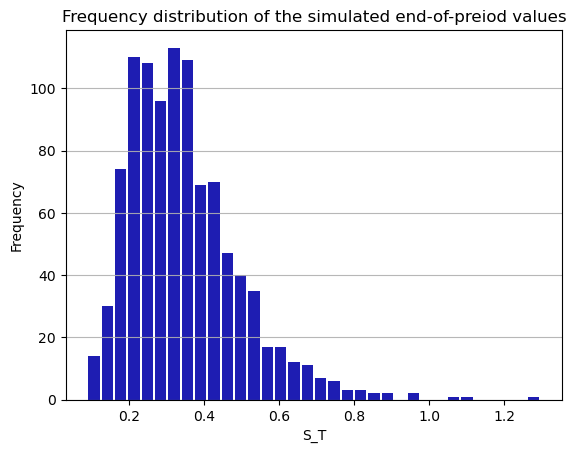

In [39]:
import matplotlib.pyplot as plt
n, bins, patches = plt.hist(x=S[:,-1], bins='auto', color='#0504aa',alpha=0.9, rwidth=0.85)

plt.grid(axis='y', alpha=0.9)
plt.xlabel('S_T')
plt.ylabel('Frequency')
plt.title('Frequency distribution of the simulated end-of-preiod values')

In [40]:
c = np.mean(np.maximum(S[:,-1] - K,0))
print('European call', str(c))

European call 0.016969274912483772


## Calculating greeks for risk management

In order to draw graph for each greek, Importing package for 3d graph

In [41]:
from mpl_toolkits.mplot3d import Axes3D

# Greeks

# 1) Delta

In [42]:
def delta(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - q - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        delta = np.exp(- q * T) * si.norm.cdf(d1, 0.0, 1.0)
    elif payoff == "put":
        delta =  - np.exp(- q * T) * si.norm.cdf(- d1, 0.0, 1.0)
    
    return delta

In [43]:
S = np.linspace(0.10, 0.50, 30)
T = np.linspace(0.10, 0.7, 30)
Delta = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Delta[i,j] = delta(S[j], 0.5, T[i], 0.03, 0, 0.83, 'call')

/var/folders/vs/wz5szqqs3pj2cvcvgqx13jw80000gn/T/ipykernel_59490/3601117308.py:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


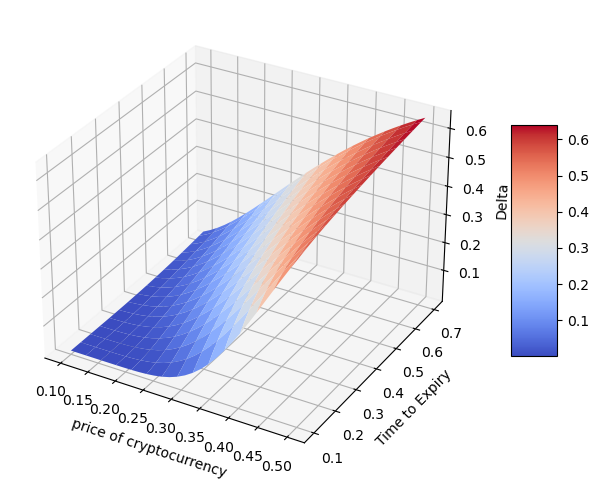

In [44]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Delta, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('price of cryptocurrency')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Delta')
fig.colorbar(surf, shrink=0.5, aspect=5);

In [45]:
d = delta(0.34, 0.5, 0.25, 0.03, 0, 0.83, 'call')
print('The value of Delta is', d.round(4),'.','If the stock price increase 1 dollar, then the value of the option will increase $', d.round(4))
    

The value of Delta is 0.2408 . If the stock price increase 1 dollar, then the value of the option will increase $ 0.2408


# Gamma

In [46]:
def gamma(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    gamma = np.exp(- r * T) * si.norm.pdf(d1, 0.0, 1.0) / (vol * S * np.sqrt(T))
    
    return gamma

In [47]:
S = np.linspace(0.10, 0.50, 50)
T = np.linspace(0.10, 0.50, 50)
Gamma = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Gamma[i,j] = gamma(S[j], 0.5, T[i], 0.03, 0, 0.83, 'call')

/var/folders/vs/wz5szqqs3pj2cvcvgqx13jw80000gn/T/ipykernel_59490/3894109105.py:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


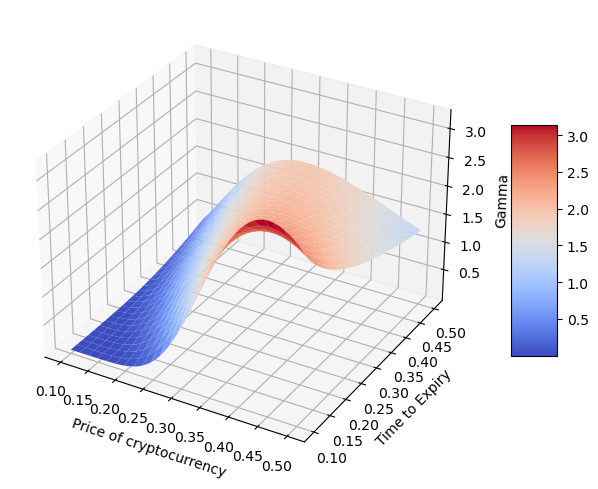

In [48]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Gamma, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Price of cryptocurrency')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Gamma')
fig.colorbar(surf, shrink=0.5, aspect=5);

In [49]:
def gamma(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    gamma = np.exp(- q * T) * si.norm.pdf(d1, 0.0, 1.0) / (vol * S * np.sqrt(T))
    
    return gamma

In [50]:
gamma(0.34, 0.5, 0.25, 0.03, 0, 0.83, 'call')

2.2072038467489135

# 3) Speed

In [51]:
def speed(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    speed = - np.exp(- q * T) * si.norm.pdf(d1, 0.0, 1.0) / ((vol **2) * (S**2) * np.sqrt(T)) * (d1 + vol * np.sqrt(T))
    
    return speed

In [52]:
S = np.linspace(0.10, 0.50, 50)
T = np.linspace(0.10, 0.50, 50)
Speed = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Speed[i,j] = speed(S[j], 0.50, T[i], 0.03, 0, 0.83, 'call')

/var/folders/vs/wz5szqqs3pj2cvcvgqx13jw80000gn/T/ipykernel_59490/3090571425.py:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


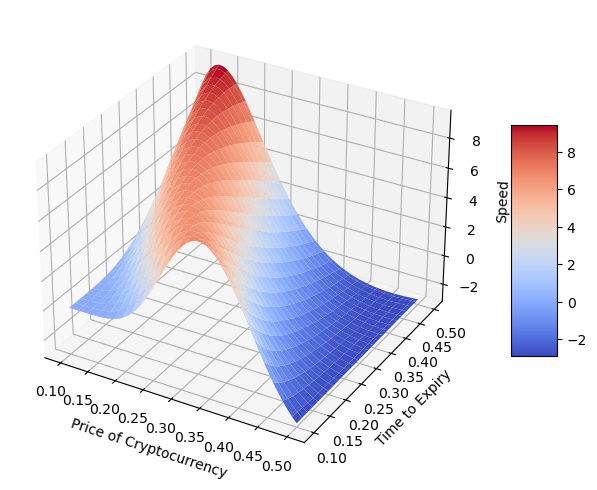

In [53]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Speed, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Price of Cryptocurrency')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Speed')
fig.colorbar(surf, shrink=0.5, aspect=5);

In [54]:
speed(0.34, 0.50, 0.25, 0.03, 0, 0.83, 'call')

2.258315973331972

# 3) Theta

In [55]:
def theta(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - q - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        theta = vol * S * np.exp(- q * T) * si.norm.pdf(d1, 0.0, 1.0) / (2 * np.sqrt(T)) - q * S * np.exp(-q * T) * si.norm.cdf(d1, 0.0, 1.0) + r * K * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
    elif payoff == "put":
        theta = vol * S * np.exp(- q * T) * si.norm.pdf(-d1, 0.0, 1.0) / (2 * np.sqrt(T)) + q * S * np.exp(-q * T) * si.norm.cdf(-d1, 0.0, 1.0) - r * K * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0)
    
    return theta

In [56]:
S = np.linspace(0.10, 0.50, 50)
T = np.linspace(0.10, 0.50, 50)
Theta = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Theta[i,j] = theta(S[j], 0.50, T[i], 0.03, 0, 0.83, 'call')

/var/folders/vs/wz5szqqs3pj2cvcvgqx13jw80000gn/T/ipykernel_59490/1244808799.py:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


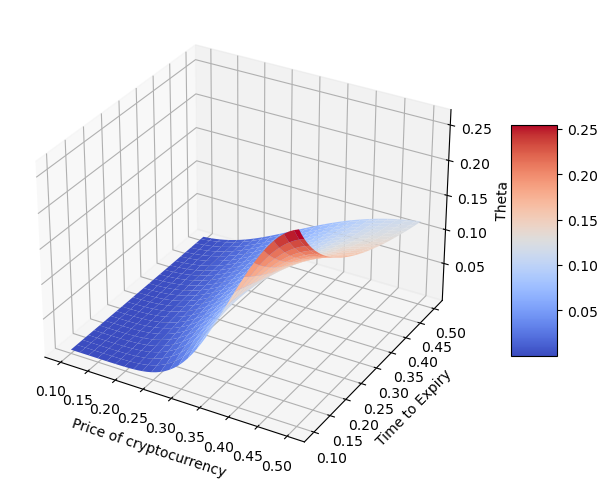

In [57]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Theta, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Price of cryptocurrency')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Theta')
fig.colorbar(surf, shrink=0.5, aspect=5);

In [58]:
theta(0.34, 0.50, 0.25, 0.03, 0, 0.83, 'call')

0.08984701659913742

# 4) Rho

In [59]:
def rho(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - q - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        rho =  K * T * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
    elif payoff == "put":
        rho = - K * T * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0)
    
    return rho

In [60]:
S = np.linspace(0.1, 0.50, 50)
T = np.linspace(0.1, 0.50, 50)
Rho = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Rho[i,j] = rho(S[j], 0.50, T[i], 0.03, 0, 0.83, 'call')

/var/folders/vs/wz5szqqs3pj2cvcvgqx13jw80000gn/T/ipykernel_59490/3951647113.py:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


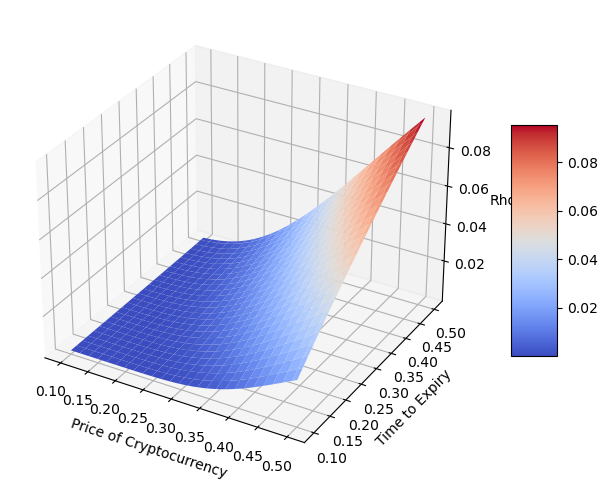

In [61]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Rho, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Price of Cryptocurrency')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Rho')
fig.colorbar(surf, shrink=0.5, aspect=5);

In [62]:
rho(0.34, 0.5, 0.25, 0.03, 0, 0.83, 'call')

0.01633039003061293

# Vega

In [63]:
def vega(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    vega = S * np.sqrt(T) * np.exp(-q * T) * si.norm.pdf(d1, 0.0, 1.0)
    
    return vega

In [64]:
S = np.linspace(0.1, 0.50, 50)
T = np.linspace(0.1, 0.50, 50)
Vega = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Vega[i,j] = vega(S[j], 0.50, T[i], 0.03, 0, 0.83, 'call')

/var/folders/vs/wz5szqqs3pj2cvcvgqx13jw80000gn/T/ipykernel_59490/2255444555.py:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


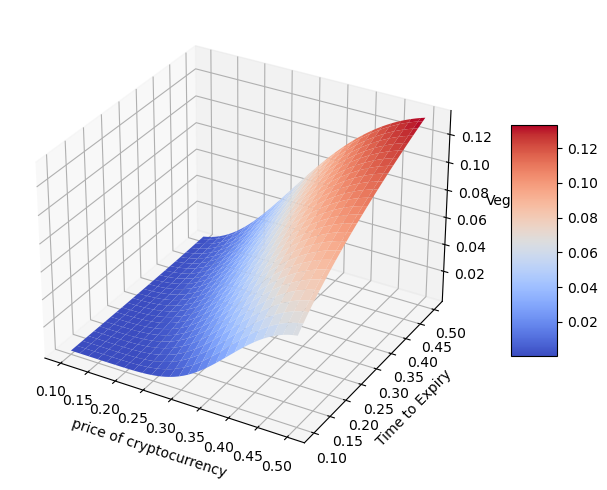

In [65]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Vega, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('price of cryptocurrency')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Vega')
fig.colorbar(surf, shrink=0.5, aspect=5);

In [66]:
v = vega(0.34, 0.50, 0.25, 0.03, 0, 0.83, 'call')
print('The value of Vega is', v.round(4),'.','If the volatility increases 1%, then the value of the option will increase $', v.round(4))

The value of Vega is 0.0529 . If the volatility increases 1%, then the value of the option will increase $ 0.0529
